<a href="https://colab.research.google.com/github/Sarath-Haridas/EDA-on-Hotel-booking-data/blob/main/Individual_Notebook_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

##Mounting the drive and reading the CSV file.

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
filepath = '/content/drive/MyDrive/Almabetter/Cohort Florence/Module_1_Python/EDA Capstone Project/Copy of Hotel Bookings.csv'

In [ ]:
df = pd.read_csv(filepath)

##Overview of the data

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
##Making a copy of dataset and converting int objects to date time objects
df1 = df.copy()
df1['arrival_date_year'] = pd.to_datetime(df['arrival_date_year'], format = '%Y')
df1['arrival_date_year'] = df1['arrival_date_year'].dt.year
df1['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Cleaning the data

In [ ]:
#looking at duplicates
df1.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [ ]:
#dropping the duplicate values
df1 = df1.drop_duplicates()
df1.shape

(87396, 32)

In [ ]:
df1.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
##Filling the null values
null_values =  ['company', 'agent','children']
for i in null_values:
  df1[i].fillna(0, inplace = True)

df1['country'].fillna('others', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
## there are no more null values
df1.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [ ]:
df1[df1['adults']+df1['children']+df1['babies']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
## So there are data where bookings weren't cancelled and no one had arrived
df1.drop(df1[df1['adults']+df1['children']+df1['babies']==0].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1["Total_Guests"] = df['adults']+df['children']+df['babies']
df1['total_stay_duration'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##**Exploring the data**

##1.The type of hotel that are preferred more by the guests.

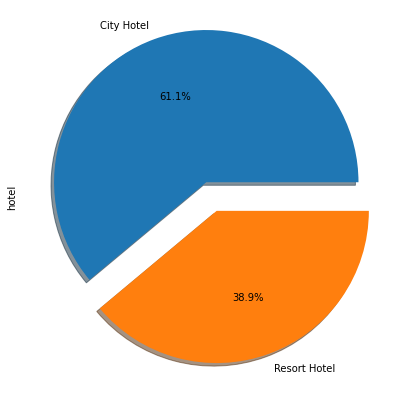

In [ ]:
df1['hotel'].value_counts()
df1['hotel'].value_counts().plot.pie(explode=(0.1,0.1), shadow = True, figsize=(10,7), autopct='%1.1f%%')

I.Observation:

City hotels are preferred more than resort hotels
 



##2.Countries that have got highest bookings

Text(0.5, 1.0, 'Countries vs count')

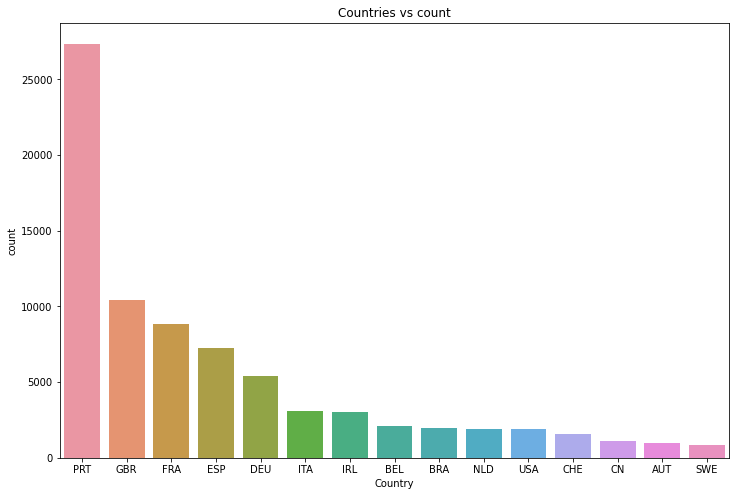

In [ ]:
Top_Country_list = df1['country'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index':'Country','country':'count'})[:15]
#Top_Country_list
plt.figure(figsize=(12,8))
sns.barplot(x=Top_Country_list['Country'],y=Top_Country_list['count'])
plt.title("Countries vs count")

II.Observation

Country with code 'PRT'(Portgal) had the most number of bookings followed by GBR (Great Britan) & FRA(France).

##3.Percentage of cancellations


Text(0.5, 1.0, 'Pie Chart for Cancellation and non-cancellation')

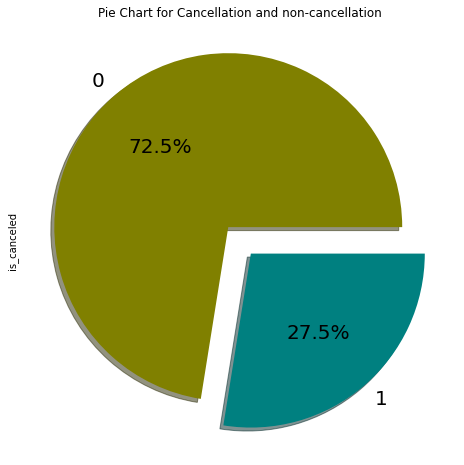

In [ ]:
colors = ['olive','teal']
df1['is_canceled'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20,colors=colors)   
plt.title('Pie Chart for Cancellation and non-cancellation')
#0 denotes not cancelled and 1 denotes cancelled 

III.Observation:

The percentage of cancellation is 27.5%.

##4.Booking analysis according to months and years

In [ ]:
##Finding out whcih month has the highest booking for the past few years
Month_wise_traffic_in_past_years = df1.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count().unstack()
Month_wise_traffic_in_past_years

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,NaN,2447.0,1975.0,NaN,NaN,1672.0,NaN,NaN,NaN,1662.0,2694.0,2834.0
2016,3767.0,4415.0,3137.0,2799.0,1849.0,3842.0,3515.0,3826.0,3777.0,3311.0,4227.0,3848.0
2017,4133.0,4380.0,NaN,3284.0,2836.0,4529.0,4241.0,3663.0,4567.0,NaN,NaN,NaN


Text(0, 0.5, 'No:of bookings')

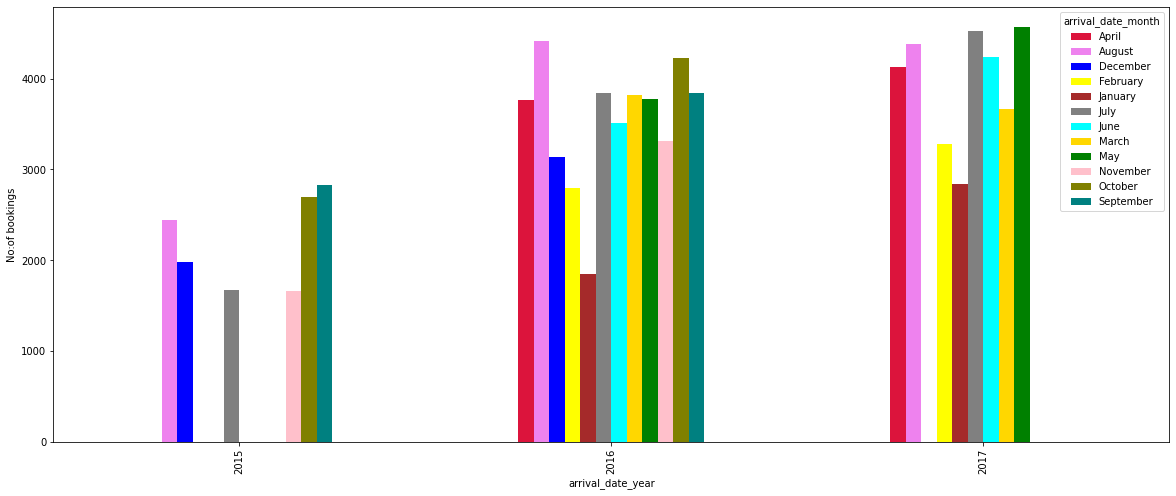

In [ ]:
colour_list = ['crimson','violet','blue','yellow','brown','grey','cyan','gold','green','pink','olive','teal']
plt.rcParams['figure.figsize'] = (20,8)
Month_wise_traffic_in_past_years.plot(kind ='bar' , color = colour_list)
plt.ylabel('No:of bookings')
plt.xlabel('Year')

IV. Observation : 

1.   August and July are the only two months in the given three years where there always has been bookings. Owners can benefit from this by raising prices and offering more services.
2.   2016 saw the largest number of hotel bookings among the given three years







Text(0, 0.5, 'No:of bookings')

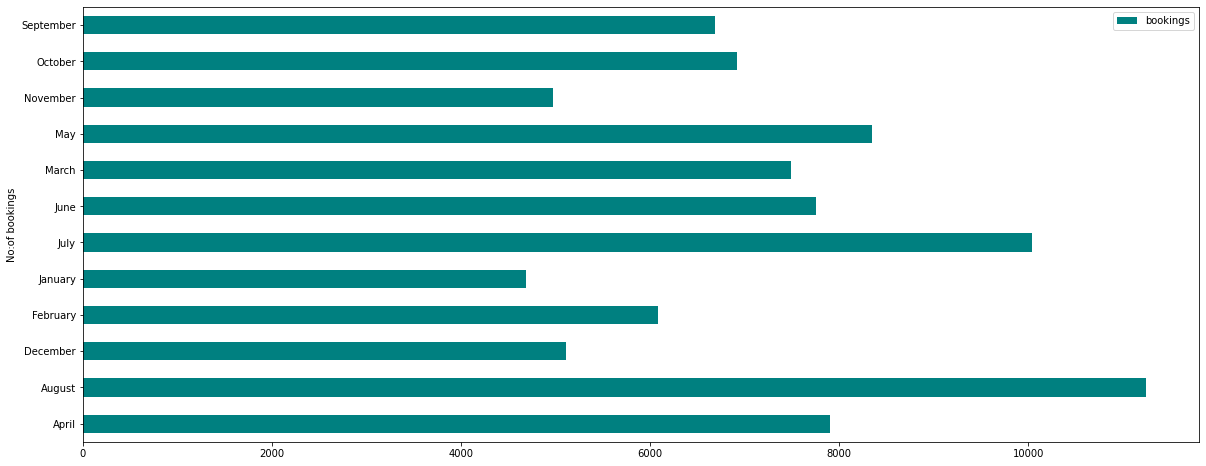

In [ ]:
##Now to get total no:of bookings in each month over the past years
Total_bookings_month_wise = df1.groupby('arrival_date_month')['hotel'].count().reset_index().rename(columns={'hotel':'bookings'})
Total_bookings_month_wise.set_index('arrival_date_month', inplace = True)
Total_bookings_month_wise.plot(kind='barh', color = 'teal')
plt.ylabel('No:of bookings')
#Total_bookings_month_wise

V.Observation

Most number of hotel bookings were made for the month of August. It can be inferred that most people were having holidays during that time of the year,and the least is made for January when people may have been more occupied or busy.

##Preferance of rooms


In [ ]:
#type of rooms
df_1 = df1['reserved_room_type'].value_counts().reset_index().rename(columns={'index':'room_type','reserved_room_type':'count'})

Text(0, 0.5, 'Bookings')

<Figure size 864x432 with 0 Axes>

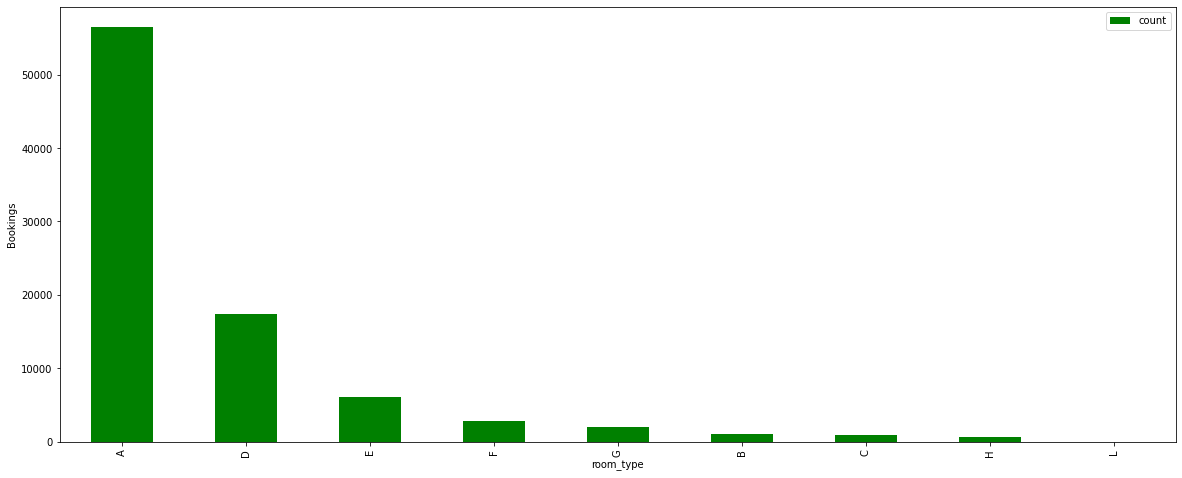

In [ ]:
plt.figure(figsize=(12,6))
df_1.set_index('room_type').plot(kind ='bar',color='g')
plt.ylabel('Bookings')


VI.Observation

Room type 'A' is preferred more at the time of booking. Whereas preferance for room type 'L' is relatively low. Owners can offer more of room type 'A' to customers at an appropriate cost.

##Higest cancellation rate across various distribution channels.

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

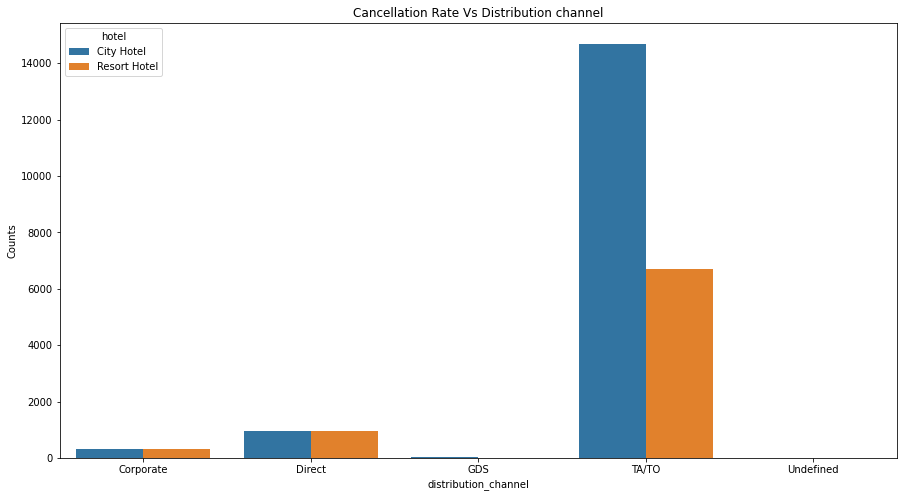

In [ ]:
#selecting the cancelled bookings
canceled_df=df1[df1['is_canceled']==1]
#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})

plt.figure(figsize=(15,8))
sns.barplot(x='distribution_channel',y='Counts',hue='hotel',data=canceled_df)
plt.title('Cancellation Rate Vs Distribution channel')

VII. Observation


1.  In "TA/TO", City hotels has the high cancellation rate compared to resort hotels.
2. Both in "Corporate and direct" the hotels has almost same cancellation rate.



##Highest cancellation rate across various market segment.

In [ ]:
 #selecting cancelled bookings
df_market_segment=df1[df1['is_canceled']==1] 
#market_segment_df
df_market_segment=df_market_segment.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})
df_market_segment

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1257


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

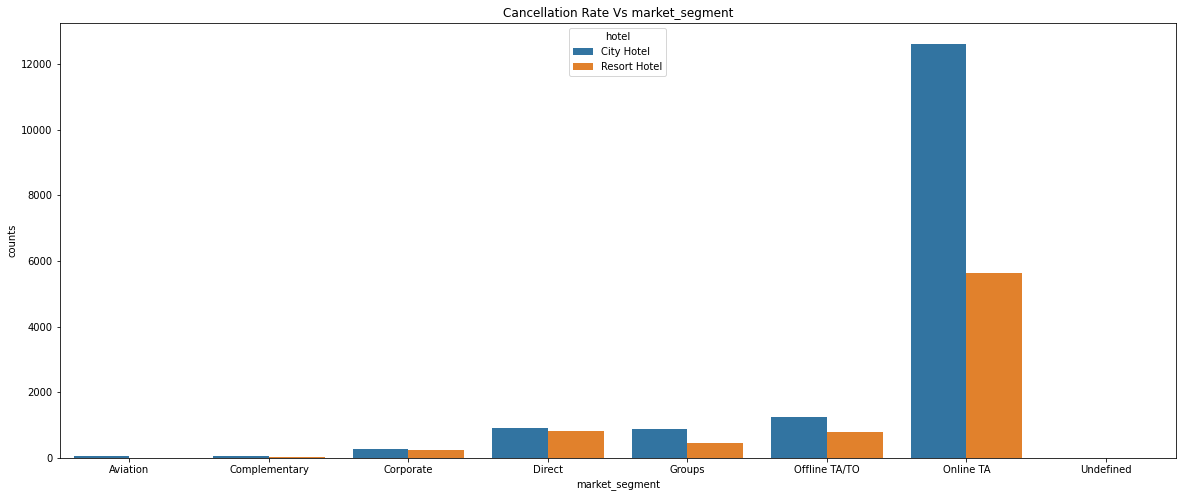

In [ ]:
#setting plotsize and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= df_market_segment)
plt.title('Cancellation Rate Vs market_segment')

VIII. Observation

'Online T/A' has the highest cancellation in both type of Hotels.In order to reduce the booking cancellations, hotels need to set the refundable/no refundable and deposit policies.

##Correlation of colums

Text(0.5, 1.0, 'Co-relation of the columns')

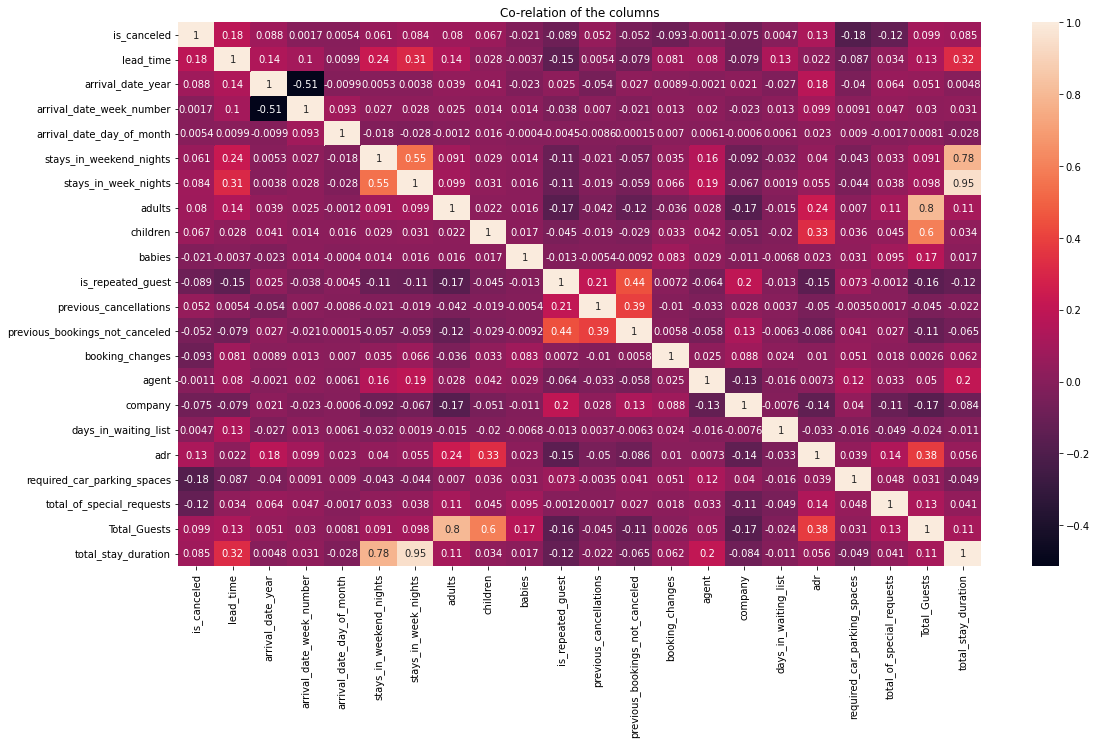

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Co-relation of the columns')

IX. Observation

1. lead_time and total_stay is positively corelated.That means more is the stay of customers more will be the lead time.
2. is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are more likely to not cancel their bookings 
3. ADR has a positive corelation with total number of guests. That means more the people more will be ADR.



##Relationship of ADR with total guests

Text(0.5, 1.0, 'ADR v/s Total Number of people')

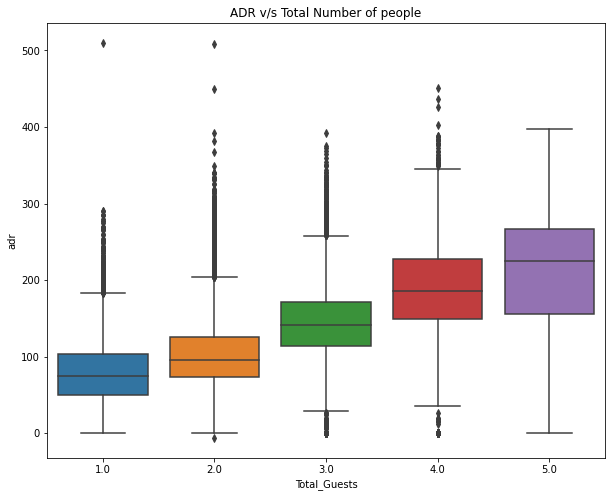

In [ ]:
plt.figure(figsize=(10,8))
df2=df1[df1['Total_Guests'] < 6]
df3= df2[df2['adr'] < 5000]
##as there was an outlier with high value, we removed that for better visualization
sns.boxplot(x=df3['Total_Guests'],y=df3['adr'])

#setting lables
plt.title('ADR v/s Total Number of people')

X. Observation

As the  total number of people increases ADR also increases.
Thus ADR and total number of people are directly proportional to each other.
This can be observed from the correlation heatmap as well where a positive relation could be witnessed.

##Contributions of various distribution channels to ADR.

Text(0.5, 1.0, 'ADR across Distribution channel')

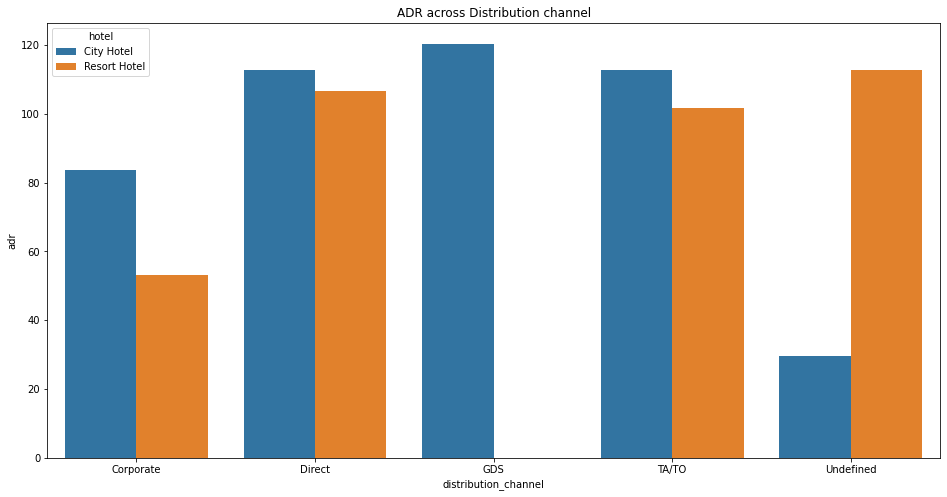

In [ ]:
#groupby distribution channel and hotel
distribution_df=df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_df, hue='hotel')
plt.title('ADR across Distribution channel')


XI. Observation:

1. As far as ADR is concerned, GDS has the highest ADR among all the distribution channels for City hotels.
2. Undefined booking channels contributed to highest ADR as far as Resort hotels are concerned.

##Relationship between ADR and total stay.

In [ ]:
#Groupby ADR, total stay, hotel
adr_vs_stay = df1.groupby(['total_stay_duration', 'adr','hotel']).size().reset_index().rename(columns={0:'count'})
adr_vs_stay

,total_stay_duration,adr,hotel,count
0,0,0.00,City Hotel,231
1,0,0.00,Resort Hotel,360
2,1,0.00,City Hotel,392
3,1,0.00,Resort Hotel,91
4,1,1.00,City Hotel,1
...,...,...,...,...
21987,48,0.00,City Hotel,1
21988,56,25.50,Resort Hotel,1
21989,56,28.79,Resort Hotel,1
21990,60,110.50,Resort Hotel,1


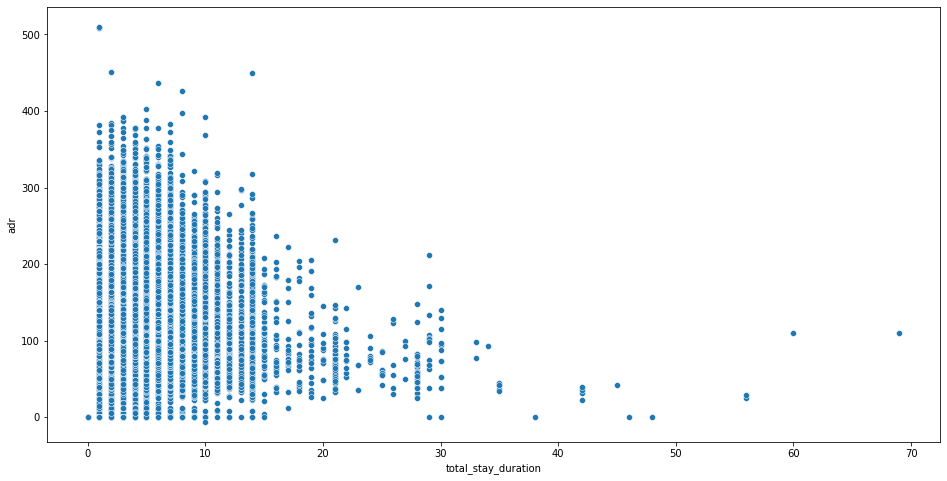

In [ ]:
#plot line chart
plt.figure(figsize = (16,8))
#sns.scatterplot(y = 'adr', x = 'total_stay_duration', data = adr_vs_stay)
##There is an outlier here as well so we use 'df3' for the visualization
sns.scatterplot(y = 'adr', x = 'total_stay_duration', data = df3)
plt.show()

XII. Observation

We can see that as length of total stay or duration of stay increases the ADR decreases. This means for longer stay, customer has a chance of finalizing a better deal.

##Conclusions

1. City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
2. 27.5 % of bookings were cancelled out of all the bookings.
3. Highest number of people visited from Portugal.
4. Most number of bookings were done in 2016.
5. Room type 'A' was most preferred at the time of booking.
6. Average ADR for city hotel is high as compared to resort hotels across all distribution channels . These City hotels are generating more revenue than the resort hotels.
7. Booking cancellation rate is high for City hotels.
8. July and August had the most Bookings because people were free/available then.
9. 'Online T/A' has the highest cancellation in both type of Hotels
10. In order to reduce the booking cancellations, hotels need to set the refundable/no refundable and deposit policies.
11. As the length of the stay increases, the ADR also decreases.So, customer has a chance of finalizing a better deal for longer stays.
